In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

### SIR Model
##### Below are some very simple dynamic models

In [3]:
#ODE
def SIR_model(y, t, beta,gamma):
    S,I,R = y
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I #
    dR_dt = gamma*I 

    return([dS_dt, dI_dt, dR_dt])


In [4]:
#I.C    
S0 = 0.9 # 1 - I(0)
I0 = 0.1
R0 = 0.0 # N*beta/gamma
beta = 0.35 # transition coefficient
gamma = 0.1 # recovery rate

#Time vec
t = np.linspace(0,100,10000)

solution = scipy.integrate.odeint(SIR_model,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

<function matplotlib.pyplot.show(close=None, block=None)>

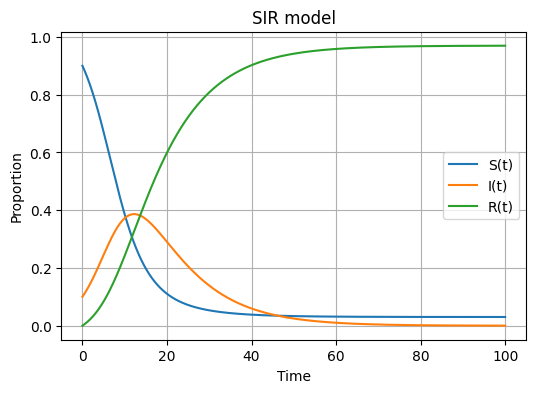

In [5]:
plt.figure(figsize=[6,4])
plt.plot(t,solution[:,0],label="S(t)")
plt.plot(t,solution[:,1],label="I(t)")
plt.plot(t,solution[:,2],label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.title("SIR model")
plt.show

#

#### SEIR model

In [ ]:
#ODE Introducing new variable E (Incubation) are more fit model for covid-19
def SEIRmodel(y, t, alpha, beta, mdelta, lmbda):
    S, E, I, R = y
    dS_dt = -alpha * (E + I) * S
    dE_dt = alpha * (E + I) * S - lmbda * E * (t - mdelta)
    dI_dt = lmbda * E * (t - mdelta) - beta * I
    dR_dt = beta * I

    return [dS_dt, dE_dt, dI_dt, dR_dt]





In [24]:
#I.C    
S0 = 0.6 # 1 - I(0)
E0 = 0.3 # Note SEIR should add up to 1 matching N 
I0 = 0.1
R0 = 0.0 # N*beta/gamma
alpha = 0.35 #transition coefficent
beta = 0.1 # recover rate
lmbda = 0.05 # incidence
mdelta = 0.02 # expectation for incubation

#Time vec
t = np.linspace(0,100,10000)

solution = scipy.integrate.odeint(SEIRmodel,[S0,E0,I0,R0],t,args=(beta,gamma,mdelta,lmbda))
solution = np.array(solution)

<function matplotlib.pyplot.show(close=None, block=None)>

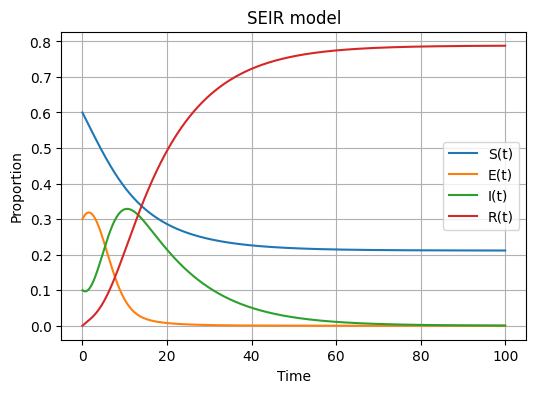

In [25]:
plt.figure(figsize=[6,4])
plt.plot(t,solution[:,0],label="S(t)")
plt.plot(t,solution[:,1],label="E(t)")
plt.plot(t,solution[:,2],label="I(t)")
plt.plot(t,solution[:,3],label="R(t)") 
plt.grid()
plt.legend()
plt.xlabel("Time")  #s 
plt.ylabel("Proportion")
plt.title("SEIR model")
plt.show